<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E8%A9%95%E4%BC%B0%E6%8C%87%E6%A8%99/mse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install wget

In [2]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


'ChineseFont.ttf'

### 均方誤差(MSE)
均方誤差是機器學習中評估回歸模型的重要指標，它特別強調大誤差的影響。

1. **什麼是MSE?**
MSE是預測值與實際值之間差的平方的平均值。

2. **公式**：MSE = (1/n) * Σ(y_i - ŷ_i)²
3. **特點**：對大誤差更加敏感，單位是原始數據單位的平方

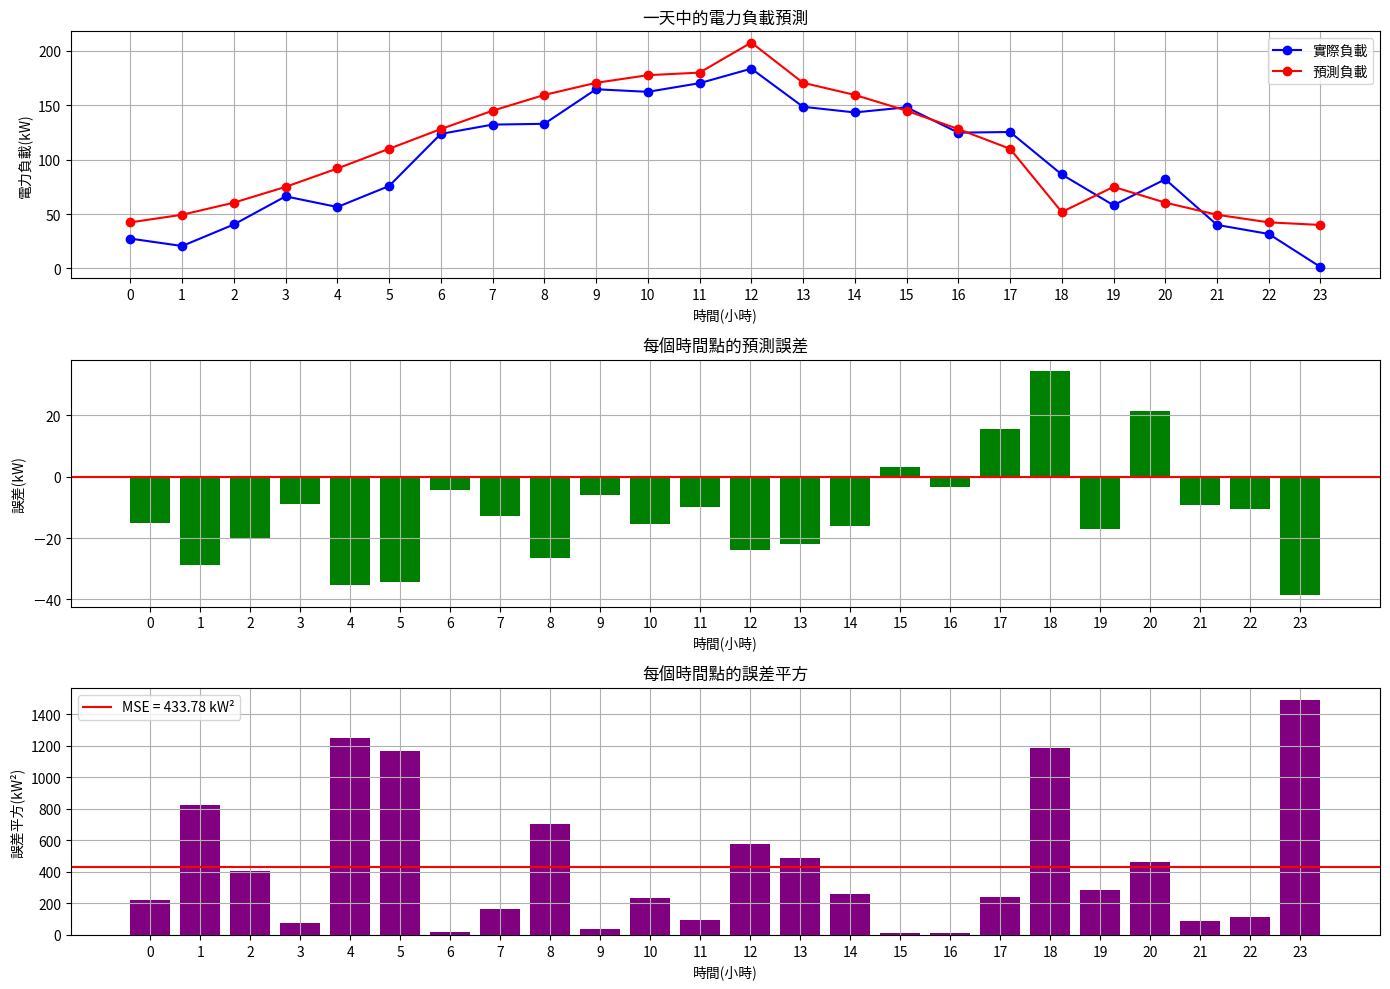

均方誤差(MSE): 433.78 kW²

高峰時段(12點和18點)與其他時段的比較:
高峰時段平均誤差平方: 882.67 kW²
其他時段平均誤差平方: 392.97 kW²
高峰時段誤差對MSE的影響是其他時段的 2.25 倍

數據集部分詳情:
    時間(小時)  實際負載(kW)  預測負載(kW)  誤差(kW)  誤差平方(kW²)
0        0     27.45     42.39  -14.93     223.04
6        6    123.69    128.12   -4.43      19.62
12      12    183.63    207.61  -23.99     575.30
18      18     86.38     51.88   34.50    1190.04
23      23      1.35     40.00  -38.65    1493.46

手動計算的MSE: 433.78 kW²


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 步驟1: 建立假數據集 - 模擬一天中不同時段的電力負載(kW)
np.random.seed(42)  # 設定隨機種子以確保結果可重現
hours = np.arange(0, 24)  # 一天24小時
# 真實用電量：模擬白天用電高，晚上用電低的情況
actual_load = 100 + 80 * np.sin(np.pi * (hours - 6) / 12) + np.random.normal(0, 15, 24)

# 步驟2: 創建預測模型(這裡用簡單公式模擬預測結果，有些預測誤差較大)
predicted_load = 110 + 70 * np.sin(np.pi * (hours - 5) / 12)  # 預測負載
# 在某些時間點(如用電高峰)增加較大誤差
predicted_load[12] += 30  # 中午12點有較大誤差
predicted_load[18] -= 40  # 晚上6點有較大誤差

# 步驟3: 計算MSE
mse = mean_squared_error(actual_load, predicted_load)

# 步驟4: 創建數據框以便於展示
df = pd.DataFrame({
    '時間(小時)': hours,
    '實際負載(kW)': actual_load,
    '預測負載(kW)': predicted_load,
    '誤差(kW)': actual_load - predicted_load,
    '誤差平方(kW²)': (actual_load - predicted_load) ** 2
})

# 步驟5: 視覺化結果
plt.figure(figsize=(14, 10))

# 繪製實際負載和預測負載
plt.subplot(3, 1, 1)
plt.plot(hours, actual_load, 'o-', color='blue', label='實際負載')
plt.plot(hours, predicted_load, 'o-', color='red', label='預測負載')
plt.title('一天中的電力負載預測')
plt.xlabel('時間(小時)')
plt.ylabel('電力負載(kW)')
plt.legend()
plt.grid(True)
plt.xticks(hours)

# 繪製誤差
plt.subplot(3, 1, 2)
plt.bar(hours, actual_load - predicted_load, color='green')
plt.title('每個時間點的預測誤差')
plt.xlabel('時間(小時)')
plt.ylabel('誤差(kW)')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.xticks(hours)

# 繪製誤差平方
plt.subplot(3, 1, 3)
error_squared = (actual_load - predicted_load) ** 2
plt.bar(hours, error_squared, color='purple')
plt.axhline(y=mse, color='r', linestyle='-', label=f'MSE = {mse:.2f} kW²')
plt.title('每個時間點的誤差平方')
plt.xlabel('時間(小時)')
plt.ylabel('誤差平方(kW²)')
plt.legend()
plt.grid(True)
plt.xticks(hours)

plt.tight_layout()
plt.show()

# 輸出結果
print(f"均方誤差(MSE): {mse:.2f} kW²")
print("\n高峰時段(12點和18點)與其他時段的比較:")
peak_hours = [12, 18]
peak_squared_errors = np.mean(error_squared[peak_hours])
other_hours = [h for h in hours if h not in peak_hours]
other_squared_errors = np.mean(error_squared[other_hours])
print(f"高峰時段平均誤差平方: {peak_squared_errors:.2f} kW²")
print(f"其他時段平均誤差平方: {other_squared_errors:.2f} kW²")
print(f"高峰時段誤差對MSE的影響是其他時段的 {peak_squared_errors/other_squared_errors:.2f} 倍")

print("\n數據集部分詳情:")
print(df.iloc[[0, 6, 12, 18, 23]].round(2))  # 只顯示部分時間點的數據

# 手動計算MSE，展示公式實現
manual_mse = np.mean((actual_load - predicted_load) ** 2)
print(f"\n手動計算的MSE: {manual_mse:.2f} kW²")


**MSE 與 MAE 的比較**
讓我們比較一下MSE與之前學習的MAE：

| 特性               | 均方誤差 (MSE)                     | 平均絕對誤差 (MAE)             |
|--------------------|------------------------------------|--------------------------------|
| **公式**          | (1/n) * Σ(y_i - ŷ_i)²             | (1/n) * Σ|y_i - ŷ_i|          |
| **單位**          | 原始數據單位的平方                 | 與原始數據相同                 |
| **對大誤差的敏感度** | 高 (因為平方運算)                 | 中等 (線性關係)                |
| **解釋性**         | 較難直觀理解                      | 容易理解                      |



### MSE的特點與應用
1. **對大誤差更敏感**：通過平方運算，MSE對離群值和大誤差給予更大的懲罰
2. **數學特性良好**：MSE的導數連續，便於優化算法使用
3. **常見應用**：
    - **電力負載預測**：高峰時段的大誤差可能導致電網問題
    - **金融預測**：大幅誤判可能造成重大財務損失
    - **工業生產**：關鍵參數的大誤差可能導致產品品質問題


### 學習重點
1. MSE通過平方運算「放大」了大誤差的影響
2. 從圖表中可以看出，個別時段的大誤差對整體MSE貢獻很大
3. MSE的單位是原始數據單位的平方，解釋時需特別注意
4. 在決定使用MSE還是MAE時，要考慮具體應用場景中大誤差的重要性